In [6]:
pip install Flask opencv-python tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 21.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
# Functioning for image preprocessing
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (196, 196))
    img = img / 255.0
    return img


In [3]:
# Specify the paths to the folders
fire_folder = r"/Users/shashi/Documents/capstone project 4/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test/fire"
non_fire_folder = r"/Users/shashi/Documents/capstone project 4/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test/non fire"
smoke_folder = r"/Users/shashi/Documents/capstone project 4/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test/Smoke"

In [4]:
# Get the list of image paths in each folder
fire_img_paths = [os.path.join(fire_folder, file) for file in os.listdir(fire_folder)]
non_fire_img_paths = [os.path.join(non_fire_folder, file) for file in os.listdir(non_fire_folder)]
smoke_img_paths = [os.path.join(smoke_folder, file) for file in os.listdir(smoke_folder)]

In [5]:
#We create a dataframe with filepath images and label (1 = fire , 0 = without fire, 2 = smoke images)

lst_fire = []
for x in fire_img_paths:
  lst_fire.append([x,1])
lst_nn_fire = []
for x in non_fire_img_paths:
  lst_nn_fire.append([x,0])
lst_smoke = []
for x in smoke_img_paths:
  lst_smoke.append([x,2])
lst_complete = lst_fire + lst_nn_fire + lst_smoke
random.shuffle(lst_complete)

In [6]:
df = pd.DataFrame(lst_complete,columns = ['files','target'])
df.head(10)

,files,target
0,/Users/shashi/Documents/capstone project 4/FOR...,1
1,/Users/shashi/Documents/capstone project 4/FOR...,0
2,/Users/shashi/Documents/capstone project 4/FOR...,2
3,/Users/shashi/Documents/capstone project 4/FOR...,0
4,/Users/shashi/Documents/capstone project 4/FOR...,0
5,/Users/shashi/Documents/capstone project 4/FOR...,1
6,/Users/shashi/Documents/capstone project 4/FOR...,0
7,/Users/shashi/Documents/capstone project 4/FOR...,0
8,/Users/shashi/Documents/capstone project 4/FOR...,2
9,/Users/shashi/Documents/capstone project 4/FOR...,2


In [7]:
df.shape

(10500, 2)

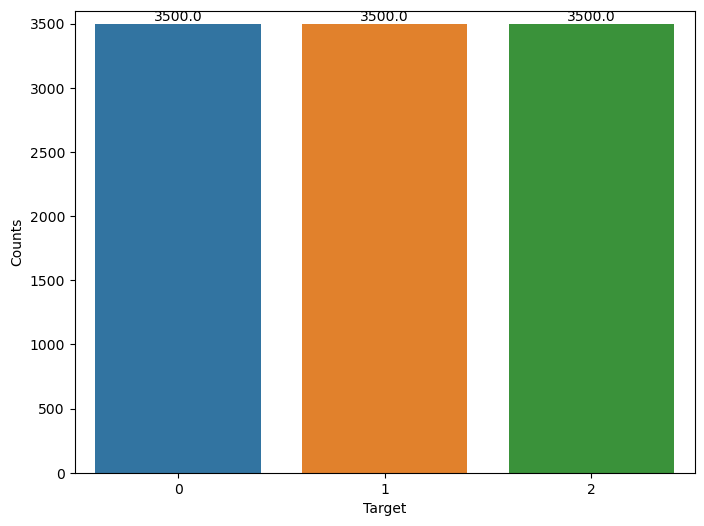

In [8]:
fig = plt.figure(figsize=(8,6)) 
plt.ylim(0,3600)
ax = sns.countplot(x=df['target'])

plt.xlabel('Target')
plt.ylabel('Counts')


# Annotating the bar graph
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()

In [10]:
# Preprocess all images
X_fire = np.array([preprocess_image(img_path) for img_path in fire_img_paths])
X_non_fire = np.array([preprocess_image(img_path) for img_path in non_fire_img_paths])
X_smoke = np.array([preprocess_image(img_path) for img_path in smoke_img_paths])


libpng warning: iCCP: known incorrect sRGB profile


In [11]:
# Create labels for each category (1 for fire, 0 for non-fire, 2 for smoke)
y_fire = np.ones(X_fire.shape[0])
y_non_fire = np.zeros(X_non_fire.shape[0])
y_smoke = 2 * np.ones(X_smoke.shape[0])